### GSI summer student program 

Started this notebook on 09/08/2024. First goal is to perform a balistic correction on the energies measured by the 16 strip detector, in order to do it I extracted data from the go4 histogram to perform a quadratic fit on energies vs. strip position for each strip.

In [172]:
# importing the useful packages
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

# defining directories 
work_dir = os.getcwd()
data_dir = os.path.join(work_dir, "Uncalib_position")


print("work dir is %s" % work_dir)
print("data dir is %s" % data_dir)

work dir is d:\GSI\SHIP
data dir is d:\GSI\SHIP\Uncalib_position


In [179]:
# reading data
filename = "E vs Calib Postion top 01.hdat"
filepath = os.path.join(data_dir, filename)
my_df = pd.read_csv(filepath, sep="\t", header=1) 
my_df.columns

Index(['# X ', 'Y ', 'Z ', 'Content'], dtype='object')

Text(0.5, 1.0, 'Histogram of Energy vs Calib Position strip 01')

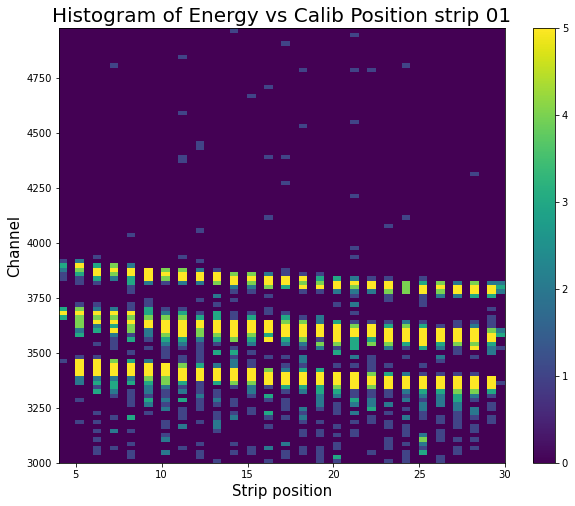

In [208]:
position = my_df["# X "].to_numpy()
energy = my_df["Y "].to_numpy()
content = my_df['Content']


# selecting only the relevant bins
index = np.where(content!=0)
selected_energy = energy[index]
selected_position = position[index]

# plotting the histogram

fig = plt.figure(figsize=(10,8))

h,xedges,yedges,image= plt.hist2d(selected_position, selected_energy, bins = (52, 100))
plt.colorbar()
plt.xlabel("Strip position", fontsize=15)
plt.ylabel("Channel", fontsize=15)
plt.title("Histogram of Energy vs Calib Position strip 01", fontsize=20)
#plt.ylim(3200,3450)
#print(h[0])
#print(h[1])



In [209]:
# Find the indices where the bin counts are greater than 4
indices = np.where(h > 4)

# Extract the bin edges corresponding to these indices
x_coords = (xedges[indices[0]] + xedges[indices[0] + 1]) / 2
y_coords = (yedges[indices[1]] + yedges[indices[1] + 1]) / 2

xx = []
yy = []

# Print or store the coordinates
for x, y in zip(x_coords, y_coords):
    #print(f"X: {x}, Y: {y}")
    xx.append(x)
    yy.append(y)

'''
# Plotting the selected points
fig2=plt.figure(figsize=(12,8))
plt.scatter(xx,yy)
plt.xlabel("Strip position", fontsize=15)
plt.ylabel("Channel", fontsize=15)
plt.title("Scatter plot of Energy vs Calib Position strip 01", fontsize=20)'''

'\n# Plotting the selected points\nfig2=plt.figure(figsize=(12,8))\nplt.scatter(xx,yy)\nplt.xlabel("Strip position", fontsize=15)\nplt.ylabel("Channel", fontsize=15)\nplt.title("Scatter plot of Energy vs Calib Position strip 01", fontsize=20)'

In [210]:

yy = np.array(yy)
xx = np.array(xx)
cond1 = yy<3500 # condition for first curve
cond2_a = yy>3500 # condition for second curve
cond2_b = yy<3700 # condition for second curve
cond3 = yy>3700 # condition for third curve

# first curve
index1 = np.where(cond1)
yy1 = yy[index1]
xx1 = xx[index1]

# second curve
index2 = np.where(np.logical_and(cond2_a, cond2_b))
yy2 = yy[index2]
xx2 = xx[index2]

# third curve
index3 = np.where(cond3)
yy3 = yy[index3]
xx3 = xx[index3]

a1 = 0.07393303257472039 +/- 0.04317233867630477
b1 = -5.781359381406985 +/- 1.4968254809143566
c1 = 3467.0331440893037 +/- 11.427792661461284
a2 = 0.09815971073152496 +/- 0.05600997796137778
b2 = -7.069392287744716 +/- 1.9955386885861701
c2 = 3696.678977821601 +/- 16.082847330759794
a3 = 0.0810757661180761 +/- 0.04137672889897555
b3 = -6.824551311042239 +/- 1.4781030095325272
c3 = 3918.7580004383944 +/- 11.71753974489636


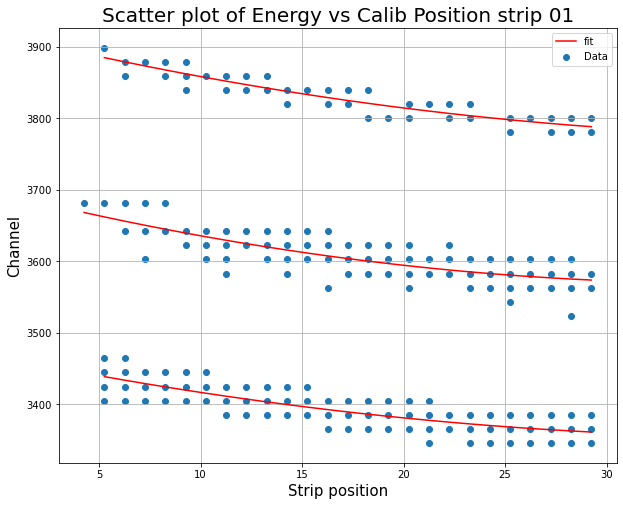

In [214]:
# trying to fit all three

yy = np.array(yy)
xx = np.array(xx)

popt, pcov = optimize.curve_fit(parabola, xx1, yy1)
print("a1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("b1 =", popt[1], "+/-", pcov[1,1]**0.5)
print("c1 =", popt[2], "+/-", pcov[2,2]**0.5)


popt2, pcov2 = optimize.curve_fit(parabola, xx2, yy2)
print("a2 =", popt2[0], "+/-", pcov2[0,0]**0.5)
print("b2 =", popt2[1], "+/-", pcov2[1,1]**0.5)
print("c2 =", popt2[2], "+/-", pcov2[2,2]**0.5)


popt3, pcov3 = optimize.curve_fit(parabola, xx3, yy3)
print("a3 =", popt3[0], "+/-", pcov3[0,0]**0.5)
print("b3 =", popt3[1], "+/-", pcov3[1,1]**0.5)
print("c3 =", popt3[2], "+/-", pcov3[2,2]**0.5)

# Plotting the fit for the first curve

fig3=plt.figure(figsize=(10,8))
plt.scatter(xx,yy, label='Data')
plt.plot(xx1, parabola(xx1, *popt), "r-", label='fit')

plt.xlabel("Strip position", fontsize=15)
plt.ylabel("Channel", fontsize=15)
plt.title("Scatter plot of Energy vs Calib Position strip 01", fontsize=20)

# plotting the fit for the second curve
plt.plot(xx2, parabola(xx2, *popt2), "r-")

# plotting the fit for the third curve
plt.plot(xx3, parabola(xx3, *popt3), "r-")
plt.legend()
plt.grid(True)


In [220]:
# Writing fit results in text file

output_name = 'fit_results'
results_dir = os.path.join(work_dir, 'results')
output_filename = os.path.join(results_dir, output_name)

text=open(output_filename+".dat", "w")

print("# Strip 01 fit results", '\n')
print(popt[0], popt[1], popt[2], file=text)
print(popt2[0], popt2[1], popt2[2], file=text)
print(popt3[0], popt3[1], popt3[2], file=text)

text.close()

# Strip 01 fit results 



In [188]:
def parabola(x, a1, b1, c1): 
    par1 = a1*x**2 + b1*x + c1

    return par1